<div style="border: 2px solid red; padding: 10px; border-radius: 5px;">
<strong>Notebook description:</strong>
    
This notebook Assign leading edge genes to clusters based on gene-pathway graph

<strong>Input Data:</strong>

`run_partitioning.py` outputs


In [2]:
import sys
sys.path.append('/Users/djuna/Documents/ABCA7lof2/')

import numpy as np
import gseapy
from scipy.sparse import csr_matrix
from tqdm.contrib.concurrent import process_map
from functools import partial
from scipy.sparse.csgraph import shortest_path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx

from ABCA7lof2.plotting_geneclusters import get_le_clusters, get_layout, plot_graph
from ABCA7lof2.geneclusters import get_gene_pathway_matrix

In [2]:
import os
import urllib.request

output_dir = "../../processed_data/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

urls = [
    'https://storage.googleapis.com/abca7lof/scRNAseq/processed_data/kl_loss.npy',
    'https://storage.googleapis.com/abca7lof/scRNAseq/processed_data/all_paths.npy',
    'https://storage.googleapis.com/abca7lof/scRNAseq/processed_data/leading_edge_0825Ex.csv',
    'https://storage.googleapis.com/abca7lof/scRNAseq/processed_data/all_scores_0825.csv'
]
for url in urls:
    local_filename = os.path.join(output_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, local_filename)
    print("Download completed!")

Download completed!
Download completed!
Download completed!
Download completed!


#### Load data

In [3]:
# get pathway gene matrix
mat = get_gene_pathway_matrix('../../processed_data/all_paths.npy')
kl_loss = np.load('../../processed_data/kl_loss.npy')
seed = np.argmin(kl_loss)

#### Cluster genes by KL with seed for min loss

In [8]:
# get clusters for Ex
leading_edge = '../../processed_data/leading_edge_0825Ex.csv'

frame, mat_sub = get_le_clusters(leading_edge, 'Ex', mat, seed, 50)
frame.to_csv('../../processed_data/pm_kl_frame.csv')
mat_sub.to_csv('../../processed_data/pm_kl_mat.csv')

dictionary = dict(zip(np.unique(frame['cluster']), [2,7,4,1,3,6,5,0]))
frame['cluster'] = [dictionary[x] for x in frame['cluster']]

# plot graph
s=10000
graph, pos, cur_labels, unique_clusters, colors, layout = get_layout(frame, mat_sub, s, 15)#10000


(111, 268)


4it [00:00, 21.08it/s, tot_impr=685, last_impr=0, loss=285] 


In [7]:
mat_sub

,ACLY,ACSS2,ADSS,AKT3,ALDH9A1,ANAPC1,ANAPC2,ANAPC4,ANAPC5,AP2A1,...,TTC26,TUBB,TXNDC15,UBB,UBC,UQCR10,USP1,WDR35,WNT2B,WRN
AGE/RAGE pathway WP2324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMP-activated Protein Kinase (AMPK) Signaling WP1403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATM Signaling Network in Development and Disease WP3878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATM Signaling Pathway WP2516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adipogenesis WP236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viral Acute Myocarditis WP4298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wnt Signaling Pathway and Pluripotency WP399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
miRNA Regulation of DNA Damage Response WP1530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
miRNA regulation of p53 pathway in prostate cancer WP3982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### plot score distributions per cluster

In [14]:
scores = pd.read_csv('../../processed_data/all_scores_0825.csv', index_col=0)

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_41559/1243217034.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], color=colors[i], kde=True,
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_41559/1243217034.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your c

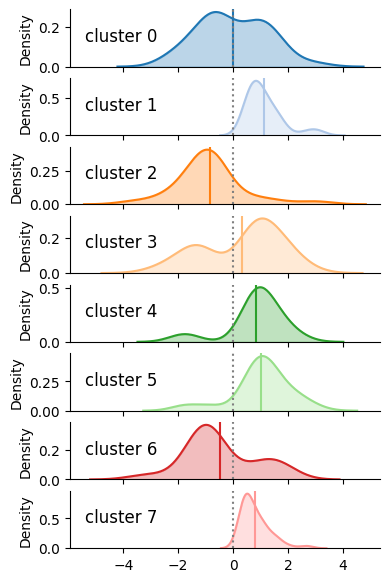

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

<Figure size 500x100 with 0 Axes>

In [15]:
# plot score distributions per cluster
g_names  = np.array(frame['description'][frame['is_gene']])

SCORES = np.array(scores.loc[g_names]['Ex'])

temp = [SCORES[frame['cluster'][frame['is_gene']]==i] for i in unique_clusters]
fig, axes = plt.subplots(8, 1, sharex=True, figsize=(4,7))

for i in range(len(temp)):
    plt.figure(figsize = (5,1))

    sns.distplot(temp[i], color=colors[i], kde=True,
        hist=None, label=str(i), ax=axes[i]);
    l1 = axes[i].lines[0]

    x1 = l1.get_xydata()[:, 0]
    y1 = l1.get_xydata()[:, 1]
    
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_title('cluster '+str(i), loc='left', y=.3, x=.05)
    axes[i].axvline(np.mean(temp[i]), color=colors[i])#, linestyle='dotted')
    axes[i].axvline(0, color='grey', linestyle='dotted')
    axes[i].fill_between(x1, y1, color=colors[i], alpha=0.3)

#fig.savefig(out_path+'_density.pdf')

#### plot clusters and names

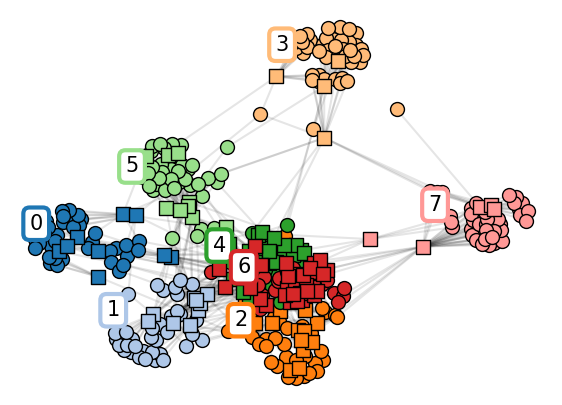

In [10]:
out_path = '../../paper/main_plots/kl_'
plot_graph(layout, pos, graph, cur_labels, unique_clusters, colors, out_path)

# plot rep names


In [ ]:
plot_rep_names(pos, unique_clusters, colors, mat_sub, frame, out_path, 3)

#### plot specific clusters

In [31]:
unique_clusters = np.unique(frame['cluster'])
cm = plt.cm.get_cmap('tab20')
colors = [cm(int(x)) for x in range(len(unique_clusters))]

/state/partition1/slurm_tmp/23872437.0.0/ipykernel_811857/599630411.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20')


/state/partition1/slurm_tmp/23872437.0.0/ipykernel_811857/2080017882.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20')
/state/partition1/slurm_tmp/23872437.0.0/ipykernel_811857/2849794604.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*pos_curr[types_curr==0].T, color=col, zorder=5, s=S, cmap='tab20', edgecolor="black", linewidth=1)
/state/partition1/slurm_tmp/23872437.0.0/ipykernel_811857/2849794604.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*pos_curr[types_curr==1].T, color=col, zorder=5, s=S, cmap='tab20', edgecolor="black", linewidth=1, marker='s')


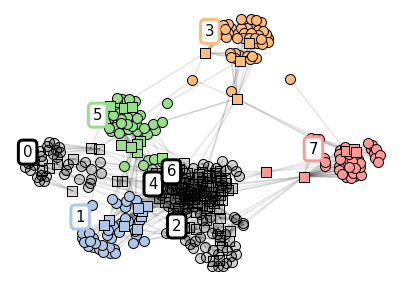

In [35]:
plot_sub_graph_only(list([5,1,3,7]), frame, 'Ex', out_path, layout, graph, pos, cur_labels, scores, mat_sub, (5,5), (2,3), (2,1))

/state/partition1/slurm_tmp/23872437.0.0/ipykernel_811857/2080017882.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab20')
/state/partition1/slurm_tmp/23872437.0.0/ipykernel_811857/2849794604.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*pos_curr[types_curr==0].T, color=col, zorder=5, s=S, cmap='tab20', edgecolor="black", linewidth=1)
/state/partition1/slurm_tmp/23872437.0.0/ipykernel_811857/2849794604.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*pos_curr[types_curr==1].T, color=col, zorder=5, s=S, cmap='tab20', edgecolor="black", linewidth=1, marker='s')


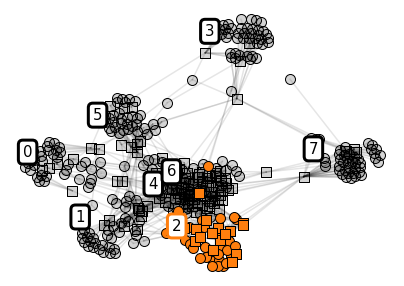

In [36]:
plot_sub_graph_only(list([2]), frame, 'Ex', out_path, layout, graph, pos, cur_labels, scores, mat_sub, (5,5), (2,3), (2,1))

#### plot representative pathways for specific clusters of interest

In [38]:
df = pd.DataFrame(np.vstack([score_rep_paths(frame, mat_sub, scores, x, 'Ex', 5) for x in [1,2,3,5,7]]))
df.columns = np.array(['score', 'path', 's', 'cluster'])

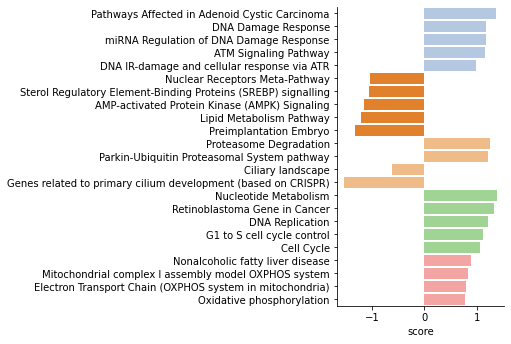

In [56]:
plt.figure(figsize=(3,5.5))

sns.barplot(data=df, x='score', y='path',  palette = [colors[x] for x in df['cluster']])
plt.xlabel('score')
plt.ylabel('')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('./pdf_figures/rep_paths.pdf')

In [147]:
T = get_top_genes(frame, scores, 4, 30, 'Ex', mat_sub)
T[T['score']> 0]

,Opc,Ast,Ex,Oli,Mic,In,gene,score
WNT2B,-0.430178,0.000000,2.365858,0.000000,2.112835,1.019986,WNT2B,2.365858
TGFB2,0.000000,0.265643,1.871591,0.000000,0.000000,-0.812561,TGFB2,1.871591
FGF5,0.000000,0.000000,1.760421,0.000000,0.000000,0.000000,FGF5,1.760421
MSH6,2.065377,0.000000,1.551225,-0.621585,0.000000,0.100880,MSH6,1.551225
DDB2,-0.009741,-0.176820,1.458102,0.000000,-0.286218,0.000000,DDB2,1.458102
MDM2,-0.000783,0.241611,1.245411,0.115424,0.169147,0.700235,MDM2,1.245411
AKT3,-0.477143,1.435827,1.147859,1.580894,1.078774,0.532310,AKT3,1.147859
PTEN,0.444729,-0.055981,1.125339,0.733725,0.108444,1.029618,PTEN,1.125339
SMAD4,0.339757,-0.100249,0.989757,0.031346,0.526675,0.031316,SMAD4,0.989757
LTBP1,-0.189354,0.770521,0.932233,0.087271,0.000000,0.140247,LTBP1,0.932233


In [118]:
# save clusters to supp 
frame.to_csv('./supplementary_tables/data_s8.csv')